In [6]:
from funcoes import read_file, f2mf, mf2f, generare_coeffs
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# 1 - 16 bits

In [7]:
nbmant = 9
nbexpo = 6
nbits = nbmant + nbexpo + 1

#-------------- Coeficientes --------------#

Znti_norm, Zdti_norm = generare_coeffs(nbmant, nbexpo)

 parameter [MAN+EXP:0] b0 = 16'h4000,
 parameter [MAN+EXP:0] b1 = 16'h6b56,
 parameter [MAN+EXP:0] b2 = 16'h6fe3,
 parameter [MAN+EXP:0] b3 = 16'hed24,
 parameter [MAN+EXP:0] b4 = 16'hef62,
 parameter [MAN+EXP:0] b5 = 16'heb0e,
 parameter [MAN+EXP:0] b6 = 16'hdbf5,
 parameter [MAN+EXP:0] b7 = 16'hc008,
 parameter [MAN+EXP:0] a1 = 16'hed5f,
 parameter [MAN+EXP:0] a2 = 16'hef35,
 parameter [MAN+EXP:0] a3 = 16'he74d,
 parameter [MAN+EXP:0] a4 = 16'he562,
 parameter [MAN+EXP:0] a5 = 16'he13d,
 parameter [MAN+EXP:0] a6 = 16'h6519,
 parameter [MAN+EXP:0] a7 = 16'hd11b,
 parameter [MAN+EXP:0] a8 = 16'h4000,
 parameter [MAN+EXP:0] a1_neg = 16'h6d5f,
 parameter [MAN+EXP:0] a2_neg = 16'h6f35,
 parameter [MAN+EXP:0] a3_neg = 16'h674d,
 parameter [MAN+EXP:0] a4_neg = 16'h6562,
 parameter [MAN+EXP:0] a5_neg = 16'h613d,
 parameter [MAN+EXP:0] a6_neg = 16'he519,
 parameter [MAN+EXP:0] a7_neg = 16'h511b,
 parameter [MAN+EXP:0] a8_neg = 16'hc000,


In [8]:
#-------------- Definição do Impulso --------------#

N = 100
x = np.zeros(N)
x[0] = 1

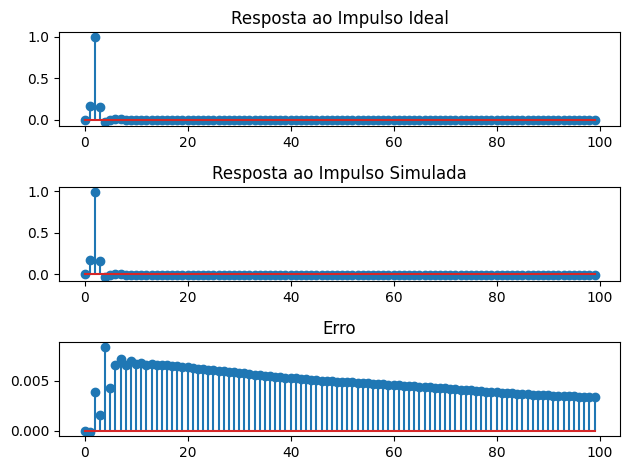

In [9]:
y_ideal = signal.lfilter(Znti_norm, Zdti_norm, x)

energy_ideal = np.sum(y_ideal**2)

#-------------- Leitura do Sinal Digital --------------#

iir_path = "filter_16.txt"
iir_file = read_file(iir_path)
iir_file = np.array(iir_file)

iir_out = np.zeros(N)
for i in range(N):
    iir_out[i] = mf2f(iir_file[i], nbmant, nbexpo)

# Removendo outliers
iir_filtered = iir_out.copy()
iir_filtered[np.abs(iir_filtered) > 1000] = 0

erro = y_ideal - iir_filtered


plt.figure()
plt.subplot(311)
plt.stem(y_ideal[0:N])
plt.title('Resposta ao Impulso Ideal')

plt.subplot(312)
plt.stem(iir_filtered[0:N])
plt.title('Resposta ao Impulso Simulada')

plt.subplot(313)
plt.stem(erro[0:N])
plt.title('Erro')

plt.tight_layout()

plt.show()

In [10]:
# Calculo do erro

energy_error16 = np.sum(erro**2)

energy_factor16 = energy_error16/energy_ideal



# 2 - 20 bits

In [11]:
nbmant = 12
nbexpo = 7
nbits = nbmant + nbexpo + 1

#-------------- Coeficientes --------------#

Znti_norm, Zdti_norm = generare_coeffs(nbmant, nbexpo)

 parameter [MAN+EXP:0] b0 = 20'h44d64,
 parameter [MAN+EXP:0] b1 = 20'h72aae,
 parameter [MAN+EXP:0] b2 = 20'h74f16,
 parameter [MAN+EXP:0] b3 = 20'hf3921,
 parameter [MAN+EXP:0] b4 = 20'hf4b11,
 parameter [MAN+EXP:0] b5 = 20'hf2872,
 parameter [MAN+EXP:0] b6 = 20'heafac,
 parameter [MAN+EXP:0] b7 = 20'hd7f3a,
 parameter [MAN+EXP:0] a1 = 20'hf3af5,
 parameter [MAN+EXP:0] a2 = 20'hf49aa,
 parameter [MAN+EXP:0] a3 = 20'hf0a67,
 parameter [MAN+EXP:0] a4 = 20'hefb13,
 parameter [MAN+EXP:0] a5 = 20'hed9ea,
 parameter [MAN+EXP:0] a6 = 20'h6f8c9,
 parameter [MAN+EXP:0] a7 = 20'he58db,
 parameter [MAN+EXP:0] a8 = 20'h4006a,
 parameter [MAN+EXP:0] a1_neg = 20'h73af5,
 parameter [MAN+EXP:0] a2_neg = 20'h749aa,
 parameter [MAN+EXP:0] a3_neg = 20'h70a67,
 parameter [MAN+EXP:0] a4_neg = 20'h6fb13,
 parameter [MAN+EXP:0] a5_neg = 20'h6d9ea,
 parameter [MAN+EXP:0] a6_neg = 20'hef8c9,
 parameter [MAN+EXP:0] a7_neg = 20'h658db,
 parameter [MAN+EXP:0] a8_neg = 20'hc006a,


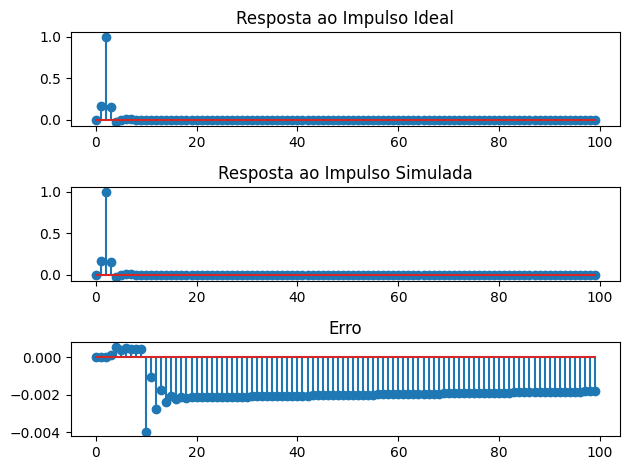

In [12]:
y_ideal = signal.lfilter(Znti_norm, Zdti_norm, x)

#-------------- Leitura do Sinal Digital --------------#

iir_path = "filter_20.txt"
iir_file = read_file(iir_path)
iir_file = np.array(iir_file)

iir_out = np.zeros(N)
for i in range(N):
    iir_out[i] = mf2f(iir_file[i], nbmant, nbexpo)

# Removendo outliers
iir_filtered = iir_out.copy()
iir_filtered[np.abs(iir_filtered) > 1000] = 0

erro = y_ideal - iir_filtered


plt.figure()
plt.subplot(311)
plt.stem(y_ideal[0:N])
plt.title('Resposta ao Impulso Ideal')

plt.subplot(312)
plt.stem(iir_filtered[0:N])
plt.title('Resposta ao Impulso Simulada')

plt.subplot(313)
plt.stem(erro[0:N])
plt.title('Erro')

plt.tight_layout()

plt.show()

In [13]:
# Calculo do erro

energy_error20 = np.sum(erro**2)

energy_factor20 = energy_error20/energy_ideal

print(energy_factor20)


0.00034745351226124255


# 3 - 24 bits

In [14]:
nbmant = 15
nbexpo = 8
nbits = nbmant + nbexpo + 1

#-------------- Coeficientes --------------#

Znti_norm, Zdti_norm = generare_coeffs(nbmant, nbexpo)

 parameter [MAN+EXP:0] b0 = 24'h60eb1e,
 parameter [MAN+EXP:0] b1 = 24'h77d570,
 parameter [MAN+EXP:0] b2 = 24'h78f8b0,
 parameter [MAN+EXP:0] b3 = 24'hf84908,
 parameter [MAN+EXP:0] b4 = 24'hf8d885,
 parameter [MAN+EXP:0] b5 = 24'hf7c393,
 parameter [MAN+EXP:0] b6 = 24'hf3fd5f,
 parameter [MAN+EXP:0] b7 = 24'hea79ce,
 parameter [MAN+EXP:0] a1 = 24'hf857a4,
 parameter [MAN+EXP:0] a2 = 24'hf8cd4f,
 parameter [MAN+EXP:0] a3 = 24'hf6d335,
 parameter [MAN+EXP:0] a4 = 24'hf65898,
 parameter [MAN+EXP:0] a5 = 24'hf54f51,
 parameter [MAN+EXP:0] a6 = 24'h764649,
 parameter [MAN+EXP:0] a7 = 24'hf146d8,
 parameter [MAN+EXP:0] a8 = 24'h5c69b2,
 parameter [MAN+EXP:0] a1_neg = 24'h7857a4,
 parameter [MAN+EXP:0] a2_neg = 24'h78cd4f,
 parameter [MAN+EXP:0] a3_neg = 24'h76d335,
 parameter [MAN+EXP:0] a4_neg = 24'h765898,
 parameter [MAN+EXP:0] a5_neg = 24'h754f51,
 parameter [MAN+EXP:0] a6_neg = 24'hf64649,
 parameter [MAN+EXP:0] a7_neg = 24'h7146d8,
 parameter [MAN+EXP:0] a8_neg = 24'hdc69b2,


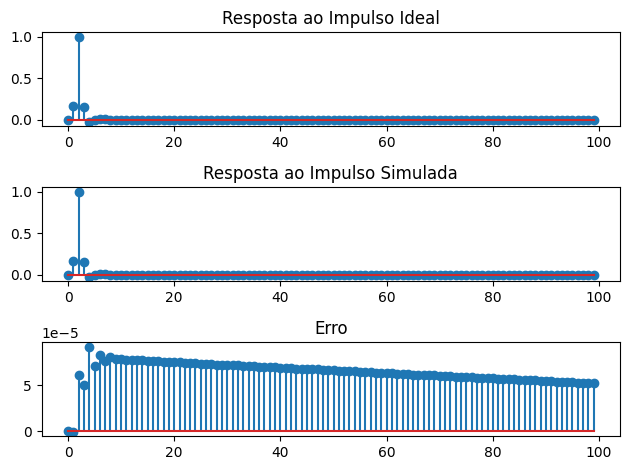

In [15]:
y_ideal = signal.lfilter(Znti_norm, Zdti_norm, x)

#-------------- Leitura do Sinal Digital --------------#

iir_path = "filter_24.txt"
iir_file = read_file(iir_path)
iir_file = np.array(iir_file)

iir_out = np.zeros(N)
for i in range(N):
    iir_out[i] = mf2f(iir_file[i], nbmant, nbexpo)


# Removendo outliers
iir_filtered = iir_out.copy()
iir_filtered[np.abs(iir_filtered) > 1000] = 0

erro = y_ideal - iir_filtered


plt.figure()
plt.subplot(311)
plt.stem(y_ideal[0:N])
plt.title('Resposta ao Impulso Ideal')

plt.subplot(312)
plt.stem(iir_filtered[0:N])
plt.title('Resposta ao Impulso Simulada')

plt.subplot(313)
plt.stem(erro[0:N])
plt.title('Erro')

plt.tight_layout()

plt.show()

In [16]:
# Calculo do erro

energy_error24 = np.sum(erro**2)

energy_factor24 = energy_error24/energy_ideal

print(energy_factor24)

4.0498908473966314e-07


# 4 - 14 bits

In [17]:
nbmant = 8
nbexpo = 5
nbits = nbmant + nbexpo + 1

#-------------- Coeficientes --------------#

Znti_norm, Zdti_norm = generare_coeffs(nbmant, nbexpo)

 parameter [MAN+EXP:0] b0 = 14'h1000,
 parameter [MAN+EXP:0] b1 = 14'h16ab,
 parameter [MAN+EXP:0] b2 = 14'h18f1,
 parameter [MAN+EXP:0] b3 = 14'h3792,
 parameter [MAN+EXP:0] b4 = 14'h38b1,
 parameter [MAN+EXP:0] b5 = 14'h3687,
 parameter [MAN+EXP:0] b6 = 14'h303f,
 parameter [MAN+EXP:0] b7 = 14'h3000,
 parameter [MAN+EXP:0] a1 = 14'h37af,
 parameter [MAN+EXP:0] a2 = 14'h389b,
 parameter [MAN+EXP:0] a3 = 14'h34a6,
 parameter [MAN+EXP:0] a4 = 14'h33b1,
 parameter [MAN+EXP:0] a5 = 14'h319f,
 parameter [MAN+EXP:0] a6 = 14'h138d,
 parameter [MAN+EXP:0] a7 = 14'h3001,
 parameter [MAN+EXP:0] a8 = 14'h1000,
 parameter [MAN+EXP:0] a1_neg = 14'h17af,
 parameter [MAN+EXP:0] a2_neg = 14'h189b,
 parameter [MAN+EXP:0] a3_neg = 14'h14a6,
 parameter [MAN+EXP:0] a4_neg = 14'h13b1,
 parameter [MAN+EXP:0] a5_neg = 14'h119f,
 parameter [MAN+EXP:0] a6_neg = 14'h338d,
 parameter [MAN+EXP:0] a7_neg = 14'h1001,
 parameter [MAN+EXP:0] a8_neg = 14'h3000,


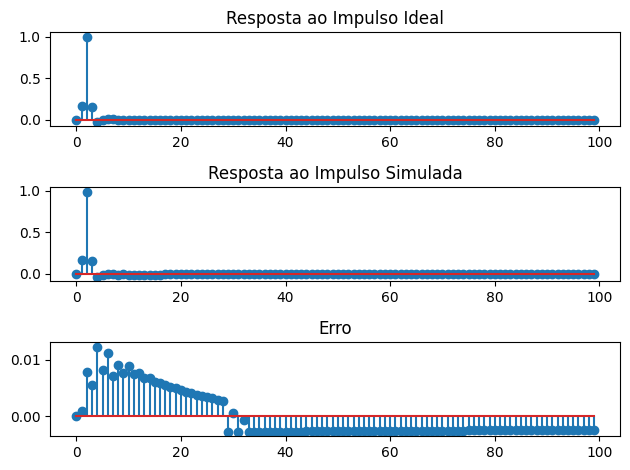

In [18]:
y_ideal = signal.lfilter(Znti_norm, Zdti_norm, x)

#-------------- Leitura do Sinal Digital --------------#

iir_path = f"filter_{nbits}.txt"
iir_file = read_file(iir_path)
iir_file = np.array(iir_file)

iir_out = np.zeros(N)
for i in range(N):
    iir_out[i] = mf2f(iir_file[i], nbmant, nbexpo)

#-------------- Removendo Outliers --------------#
iir_filtered = iir_out.copy()
iir_filtered[np.abs(iir_filtered) > 1000] = 0

erro = y_ideal - iir_filtered


plt.figure()
plt.subplot(311)
plt.stem(y_ideal[0:N])
plt.title('Resposta ao Impulso Ideal')

plt.subplot(312)
plt.stem(iir_filtered[0:N])
plt.title('Resposta ao Impulso Simulada')

plt.subplot(313)
plt.stem(erro[0:N])
plt.title('Erro')

plt.tight_layout()

plt.show()

In [19]:
energy_error14 = np.sum(erro**2)

energy_factor14 = energy_error14/energy_ideal * 100

print(energy_factor14)

0.15610974389528148


# 12 bits

In [20]:
nbmant = 7
nbexpo = 4
nbits = nbmant + nbexpo + 1

#-------------- Coeficientes --------------#

Znti_norm, Zdti_norm = generare_coeffs(nbmant, nbexpo)

 parameter [MAN+EXP:0] b0 = 12'h400,
 parameter [MAN+EXP:0] b1 = 12'h42b,
 parameter [MAN+EXP:0] b2 = 12'h4f9,
 parameter [MAN+EXP:0] b3 = 12'hc49,
 parameter [MAN+EXP:0] b4 = 12'hcd9,
 parameter [MAN+EXP:0] b5 = 12'hc22,
 parameter [MAN+EXP:0] b6 = 12'hc00,
 parameter [MAN+EXP:0] b7 = 12'hc00,
 parameter [MAN+EXP:0] a1 = 12'hc58,
 parameter [MAN+EXP:0] a2 = 12'hccd,
 parameter [MAN+EXP:0] a3 = 12'hc0a,
 parameter [MAN+EXP:0] a4 = 12'hc06,
 parameter [MAN+EXP:0] a5 = 12'hc01,
 parameter [MAN+EXP:0] a6 = 12'h404,
 parameter [MAN+EXP:0] a7 = 12'hc00,
 parameter [MAN+EXP:0] a8 = 12'h400,
 parameter [MAN+EXP:0] a1_neg = 12'h458,
 parameter [MAN+EXP:0] a2_neg = 12'h4cd,
 parameter [MAN+EXP:0] a3_neg = 12'h40a,
 parameter [MAN+EXP:0] a4_neg = 12'h406,
 parameter [MAN+EXP:0] a5_neg = 12'h401,
 parameter [MAN+EXP:0] a6_neg = 12'hc04,
 parameter [MAN+EXP:0] a7_neg = 12'h400,
 parameter [MAN+EXP:0] a8_neg = 12'hc00,


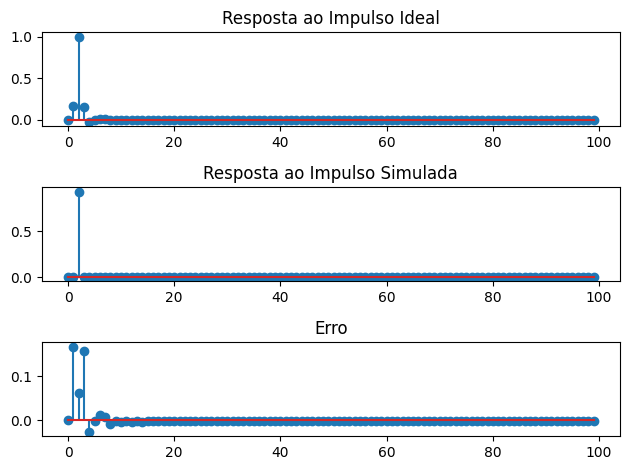

In [21]:
y_ideal = signal.lfilter(Znti_norm, Zdti_norm, x)

#-------------- Leitura do Sinal Digital --------------#

iir_path = f"filter_{nbits}.txt"
iir_file = read_file(iir_path)
iir_file = np.array(iir_file)

iir_out = np.zeros(N)
for i in range(N):
    iir_out[i] = mf2f(iir_file[i], nbmant, nbexpo)

#-------------- Removendo Outliers --------------#
iir_filtered = iir_out.copy()
iir_filtered[np.abs(iir_filtered) > 500] = 0

erro = y_ideal - iir_filtered


plt.figure()
plt.subplot(311)
plt.stem(y_ideal[0:N])
plt.title('Resposta ao Impulso Ideal')

plt.subplot(312)
plt.stem(iir_filtered[0:N])
plt.title('Resposta ao Impulso Simulada')

plt.subplot(313)
plt.stem(erro[0:N])
plt.title('Erro')

plt.tight_layout()

plt.show()

In [22]:
energy_error12 = np.sum(erro**2)

energy_factor12 = energy_error12/energy_ideal * 100

print(energy_factor12)

5.525562971604827
